# Генератор случайных матриц с заданным числом обусловленности


## Число обусловленности

В данном случае число обусловленности взято из теоремы о сходимости градиентного спуска (3.4): $\kappa = \frac{\lambda_{max}}{\lambda_{min}}$

В случае положительно определённых матриц (тот случай, который мы рассматриваем), оно совпадает с определением числа обусловленности для линейных уравнений (то, насколько сильно может меняться решение при назначительных претурбациях аргумента): $\| A \| \cdot \| A^{-1} \|$ для операторной нормы с Евклидовой нормой векторов.

## Реализация генератора

НУО, считаем, что минимальное собственное число $= 1$ (инвариантность GD относительно масштабирования).

Тогда максимальное — $\kappa$ ($\geqslant 1$ по определению).

Если уж матрица положительно определённая, то рассмотрим базис её собственных векторов — сгенерируем его случайно $^*$.
То, что порядок координат в векторе не важен, очевидно из алгоритма. Раз так, введём представление матрицы в базисе собственных векторов как $D = \operatorname{diag} \left( [\lambda_1 (= 1)] ⧺ [\operatorname{random.uniform}(\lambda_1, \lambda_n) \text{ for _ in } 0..(n - 2)] ⧺ [\lambda_n (= \kappa)] \right)$.

$^*$: «случайный базис» — мутное понятие, как и все здесь. Говорить про равно*мер*ность в пространстве положительно определённых матриц — дело неблагодарное (нам придётся ввести меру на ячейках — полная дичь). Однако можно говорить про достижимость любой матрицы из рассматриваемых (см. ниже). Так как дальше придётся преобразовывать квадратичные формы, а также говорить про собственные числа, имеет смысл рассматривать ортогональные преобразования — их можно интерпретировать и как смена базиса оператора, и как приведение квадратичной формы.

Для генерации таковой будем делать матрицу из равномерно распределённых чисел (она невырождена с вероятностью 1) и $QR$ факторизовать её (на ортогональную и правоТреугольную матрица матрицу), беря матрицу $Q$. Тогда она также с вероятностью 1 невырождена (так как $n \overset{\mathrm{ass}}{=} \operatorname{rg} A  = \operatorname{rg} QR = \min(\operatorname{rg}Q, \operatorname{rg}R)$), но на всякий случай будем повторять, пока не станет невырожденной.

Финальный штрих: получим матрицу оператора в каноническом базисе

\begin{equation}
A_{\mathrm{canonical}} = Q D Q^T = Q D Q^{-1}
\end{equation}

Самый финальный штрих: заметим, что любая кв. форма с числом обусловленности $\kappa$ и $\lambda_\mathrm{min} = 1$ с точностью до перестановки координат может быть получена таким образом. Действительно, раз матрица положительно определённая, найдём базис собственных векторов, ортогонализируем его за счёт Грамма-Шмидта — и рассмотрим

- собственные числа
- ортогональная матрица перехода в базис с. в.

И то, и другое с учётом условий выше достигается на некотором поведении рандома. $\blacksquare$

In [1]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *
from core.optimizer_evaluator import *

In [308]:
# Generate a random matrix
A = generate_positive_definite_quadratic_form(100, 10)

np.diag(A.matrix)

array([ 1.        ,  3.10933822,  3.21572503,  7.31364267,  6.36804785,
        1.32088121,  8.44006158,  9.13404265,  3.85734765,  6.13458379,
        2.09216992,  6.16624944,  7.54233654,  3.71629927,  9.44574738,
        4.54030642,  8.52735971,  9.23507134,  9.86569561,  7.84211845,
        2.2479589 ,  2.12804815,  9.54801636,  1.56001628,  7.88800253,
        9.97857594,  8.62299083,  8.20863449,  5.44913695,  5.51017934,
        5.59465743,  2.81897402,  2.91597796,  7.02042829,  5.48504823,
        7.27080471,  1.66638173,  3.85225081,  8.56184498,  3.68085203,
        7.73672311,  4.44827615,  1.29544671,  4.30442531,  3.39999602,
        9.10376179,  8.6739265 ,  5.84012188,  8.85035099,  4.53575789,
        3.58529933,  1.74826195,  5.39765844,  3.7904748 ,  1.01752992,
        5.06767591,  2.13114132,  1.13030736,  5.68474882,  9.25203123,
        5.82720987,  1.93079712,  5.41091588,  1.61403171,  2.95366032,
        6.27586029,  6.89339613,  3.00639336,  1.89462975,  6.07

In [309]:
A

QuadraticForm(matrix=array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  3.10933822,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.21572503, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  9.19398187,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         8.87546598,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 10.        ]]))

In [310]:
B = generate_positive_definite_quadratic_form(100, 10, random_orthonormal_basis)

B

QuadraticForm(matrix=array([[ 5.63214176,  0.26141773, -0.07831132, ..., -0.27352385,
         0.13361109, -0.05735684],
       [ 0.26141773,  5.33858208,  0.22708535, ..., -0.03397359,
         0.04740302,  0.0502159 ],
       [-0.07831132,  0.22708535,  5.83352466, ...,  0.29505629,
        -0.02618955, -0.06796122],
       ...,
       [-0.27352385, -0.03397359,  0.29505629, ...,  5.11637542,
        -0.03963151, -0.55715277],
       [ 0.13361109,  0.04740302, -0.02618955, ..., -0.03963151,
         6.06334213, -0.25235137],
       [-0.05735684,  0.0502159 , -0.06796122, ..., -0.55715277,
        -0.25235137,  5.59241921]]))

In [311]:
b_values = np.sort(np.linalg.eigvals(B.matrix))

In [312]:
print(b_values[0], b_values[-1])  # ≈ 0, 10

1.0000000000000038 9.999999999999993


In [313]:
basis = random_orthonormal_basis(2)

v1 = basis[:, 0]
v2 = basis[:, 1]

qf_2d = generate_positive_definite_quadratic_form(2, 10, lambda _n: basis)

In [314]:
qf_2d

QuadraticForm(matrix=array([[ 7.04266025, -4.22731586],
       [-4.22731586,  3.95733975]]))

In [315]:
v1, qf_2d(v1)

(array([-0.57323059, -0.8193941 ]), 1.0)

In [316]:
np.sort(np.linalg.eigvals(qf_2d.matrix))

array([ 1., 10.])

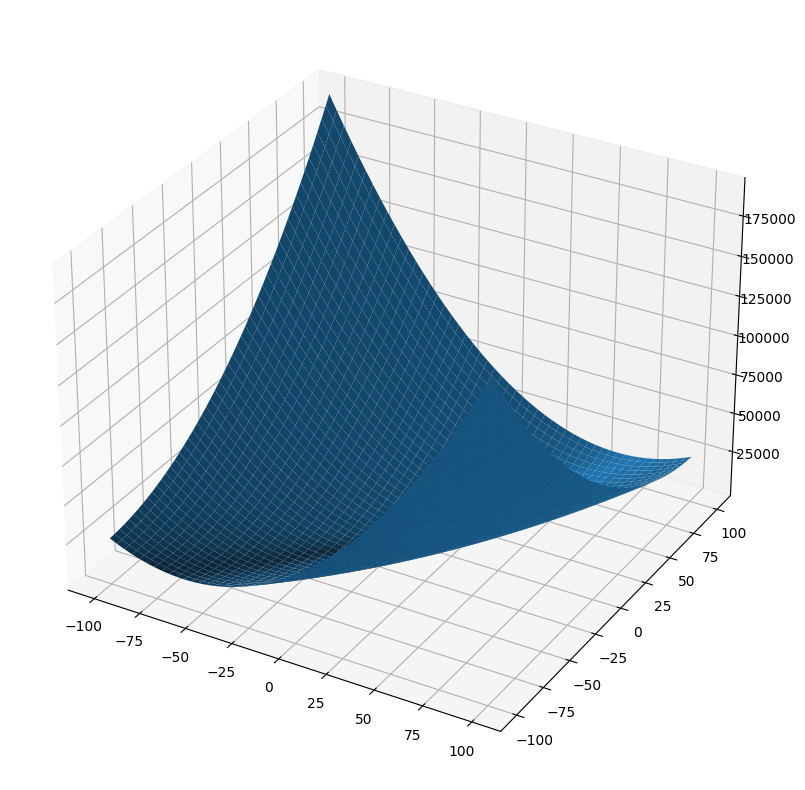

In [317]:
roi = SearchRegion2d((-100, 100), (-100, 100))
visualize_function_3d(qf_2d, roi)

Optimizer trajectory:
[[-3.00000000e+01  2.00000000e+01]
 [-4.16706357e-01 -5.97101352e-01]
 [-6.60019606e-03  3.58039952e-03]
 [-4.37571588e-04 -6.27131924e-04]
 [-7.58158138e-06  4.01800691e-06]
 [-5.42489709e-07 -7.77780382e-07]
 [-1.07891272e-08  5.49074559e-09]
 [-8.67750470e-10 -1.24428928e-09]
 [-1.81411132e-11  9.08406345e-12]
 [-1.52123132e-12 -2.18206533e-12]
 [-3.55495490e-14  1.71221309e-14]
 [-3.26672930e-15 -4.68727994e-15]
 [-8.39177023e-17  3.89586904e-17]
 [-8.32517625e-18 -1.19487871e-17]
 [-2.31630384e-19  1.03943429e-19]
 [-2.44883593e-20 -3.51566450e-20]
 [-7.31984779e-22  3.17845437e-22]
 [-8.18531369e-23 -1.17541547e-22]
 [-2.60503503e-24  1.09647189e-24]
 [-3.05875194e-25 -4.39343789e-25]
 [-1.03096804e-26  4.20995802e-27]]
Best value found: x* = [-1.03096804e-26  4.20995802e-27] with f(x*) = 1.185658884993942e-51


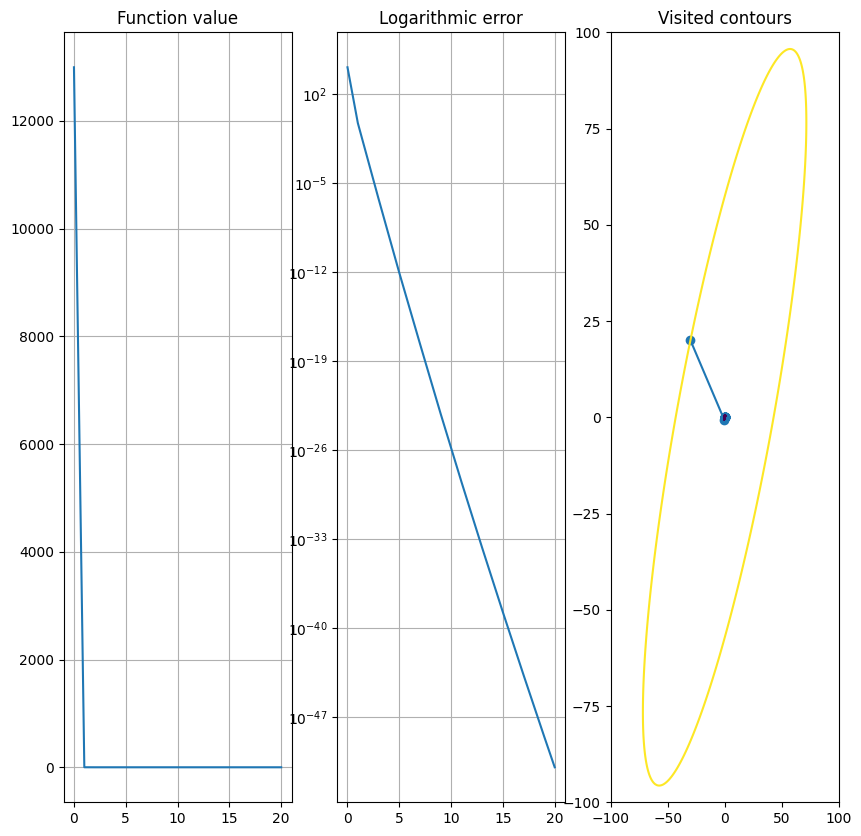

In [318]:
visualize_optimizing_process(qf_2d, roi, np.array(gradient_descent(qf_2d, qf_2d.gradient_function(), np.array([-30, 20]), fibonacci_search(30), lambda f, points: len(points) > 20)), 0)

Optimizer trajectory:
[[-3.00000000e+01  2.00000000e+01]
 [-4.16706357e-01 -5.97101353e-01]
 [-6.60020111e-03  3.58040306e-03]
 [-4.37571586e-04 -6.27131923e-04]
 [-7.58158715e-06  4.01801095e-06]
 [-5.42489707e-07 -7.77780381e-07]
 [-1.07891353e-08  5.49075127e-09]
 [-8.67750467e-10 -1.24428928e-09]
 [-1.81411268e-11  9.08407297e-12]
 [-1.52123131e-12 -2.18206532e-12]
 [-3.55495727e-14  1.71221466e-14]
 [-3.26672925e-15 -4.68728026e-15]
 [-8.39095396e-17  3.89604944e-17]
 [-8.32283478e-18 -1.19433414e-17]
 [-2.18822275e-19  1.00586876e-19]
 [-2.22506152e-20 -3.19304306e-20]
 [-2.48101646e-21  1.95167406e-22]
 [-8.88793054e-22 -1.23783366e-21]
 [-6.76897256e-22 -1.20251769e-21]
 [-6.76897256e-22 -7.23070759e-22]
 [-6.76897256e-22 -7.23078439e-22]]
Best value found: x* = [-6.76897256e-22 -7.23078439e-22] with f(x*) = 1.1578229927322222e-42


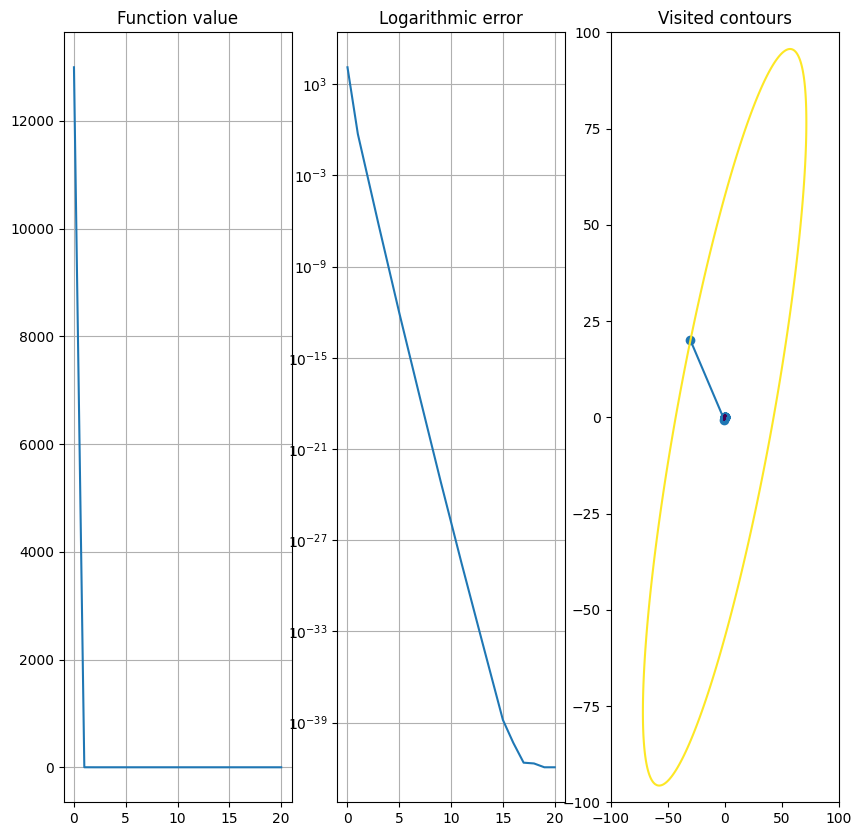

In [319]:
experimental_derivative = symmetric_gradient_computer(qf_2d)
visualize_optimizing_process(qf_2d, roi, np.array(gradient_descent(qf_2d, experimental_derivative, np.array([-30, 20]), fibonacci_search(30), lambda f, points: len(points) > 20)), 0)